위키독스 딥 러닝을 이용한 자연어 처리 입문의 토큰화 튜토리얼입니다.  

링크 : https://wikidocs.net/21698

# **02. 텍스트 전처리(Text preprocessing)**
텍스트 전처리는 풀고자 하는 문제의 용도에 맞게 텍스트를 사전에 처리하는 작업입니다. 요리를 할 때 재료를 제대로 손질하지 않으면, 요리가 엉망이 되는 것처럼 텍스트에 제대로 전처리를 하지 않으면 뒤에서 배울 자연어 처리 기법들이 제대로 동작하지 않습니다. 이번 챕터에서는 텍스트를 위한 다양한 전처리 방법들에 대해서 다룹니다.




## **02-01 토큰화(Tokenization)**
---

자연어 처리에서 크롤링 등으로 얻어낸 코퍼스 데이터가 필요에 맞게 전처리되지 않은 상태라면, 해당 데이터를 사용하고자하는 용도에 맞게 토큰화(tokenization) & 정제(cleaning) & 정규화(normalization)하는 일을 하게 됩니다. 이번에는 그 중에서도 토큰화에 대해서 학습합니다.

주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 합니다. 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의합니다. 여기서는 토큰화에 대한 발생할 수 있는 여러가지 상황에 대해서 언급하여 토큰화에 대한 개념을 이해합니다. 이어서 NLTK, KoNLPY를 통해 실습을 진행하며 토큰화를 수행합니다.

---
### **1. 단어 토큰화(Word Tokenization)**
---

토큰의 기준을 단어(word)로 하는 경우, 단어 토큰화(word tokenization)라고 합니다. 다만, 여기서 단어(word)는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주되기도 합니다.

예를 들어보겠습니다. 아래의 입력으로부터 구두점(punctuation)과 같은 문자는 제외시키는 간단한 단어 토큰화 작업을 해봅시다. 구두점이란 마침표(.), 컴마(,), 물음표(?), 세미콜론(;), 느낌표(!) 등과 같은 기호를 말합니다.

입력: **Time is an illusion. Lunchtime double so!**

이러한 입력으로부터 구두점을 제외시킨 토큰화 작업의 결과는 다음과 같습니다.

출력 : "Time", "is", "an", "illustion", "Lunchtime", "double", "so"

이 예제에서 토큰화 작업은 굉장히 간단합니다. 구두점을 지운 뒤에 띄어쓰기(whitespace)를 기준으로 잘라냈습니다. 하지만 이 예제는 토큰화의 가장 기초적인 예제를 보여준 것에 불과합니다.

보통 토큰화 작업은 단순히 구두점이나 특수문자를 전부 제거하는 정제(cleaning) 작업을 수행하는 것만으로 해결되지 않습니다. 구두점이나 특수문자를 전부 제거하면 토큰이 의미를 잃어버리는 경우가 발생하기도 합니다. 심지어 띄어쓰기 단위로 자르면 사실상 단어 토큰이 구분되는 영어와 달리, 한국어는 띄어쓰기만으로는 단어 토큰을 구분하기 어렵습니다. 그 이유는 뒤에서 언급하겠습니다.

토큰의 기준을 단어(word)로 하는 경우, 단어 토큰화(word tokenization)라고 합니다. 다만, 여기서 단어(word)는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주되기도 합니다.

---
### **2. 토큰화 중 생기는 선택의 순간**
---
토큰화를 하다보면, 예상하지 못한 경우가 있어서 토큰화의 기준을 생각해봐야 하는 경우가 발생합니다. 물론, 이러한 선택은 해당 데이터를 가지고 어떤 용도로 사용할 것인지에 따라서 그 용도에 영향이 없는 기준으로 정하면 됩니다. 예를 들어 영어권 언어에서 아포스트로피를(')가 들어가있는 단어는 어떻게 토큰으로 분류해야 하는지에 대한 선택의 문제를 보여드리겠습니다.

다음과 같은 문장이 있다고 해봅시다.

**Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.**

아포스트로피가 들어간 상황에서 Don't와 Jone's는 어떻게 토큰화할 수 있을까요? 다양한 선택지가 있습니다.  
  
* Don't
* Don t
* Dont
* Do n't
* Jone's
* Jone s
* Jone
* Jones  
  
이 중 사용자가 원하는 결과가 나오도록 토큰화 도구를 직접 설계할 수도 있겠지만, 기존에 공개된 도구들을 사용하였을 때의 결과가 사용자의 목적과 일치한다면 해당 도구를 사용할 수도 있을 것입니다. NLTK는 영어 코퍼스를 토큰화하기 위한 도구들을 제공합니다. 그 중 word_tokenize와 WordPunctTokenizer를 사용해서 아포스트로피를 어떻게 처리하는지 확인해보겠습니다.

In [1]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

우선 word_tokenize를 사용해봅시다.

In [2]:
## 단어 토큰화
print(word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


word_tokenize는 Don't를 Do와 n't로 분리하였으며, 반면 Jone's는 Jone과 's로 분리한 것을 확인할 수 있습니다.
그렇다면, wordPunctTokenizer는 아포스트로피가 들어간 코퍼스를 어떻게 처리할까요?

In [3]:
print('단어 토큰화2 :', WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있기때문에, 앞서 확인했던 word_tokenize와는 달리 Don't를 Don과 '와 t로 분리하였으며, 이와 마찬가지로 Jone's를 Jone과 '와 s로 분리한 것을 확인할 수 있습니다. 케라스 또한 토큰화 도구로서 text_to_word_sequence를 지원합니다.

In [4]:
print('단어 토큰화3 :', text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


케라스의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거합니다. 하지만 don't나 jone's와 같은 경우 아포스트로피는 보존하는 것을 볼 수 있습니다.

---
### **3. 토큰화에서 고려해야할 사항**
---
토큰화 작업을 단순하게 코퍼스에서 구두점을 제외하고 공백 기준으로 잘라내는 작업이라고 간주할 수는 없습니다. 이러한 일은 보다 섬세한 알고리즘이 필요한데 그 이유를 정리해봅니다.

#### **1) 구두점이나 특수 문자를 단순 제외해서는 안 된다.**  
  
갖고있는 코퍼스에서 단어들을 걸러낼 때, 구두점이나 특수 문자를 단순히 제외하는 것은 옳지 않습니다. 코퍼스에 대한 정제 작업을 진행하다보면, 구두점조차도 하나의 토큰으로 분류하기도 합니다. 가장 기본적인 예를 들어보자면, 마침표(.)와 같은 경우는 문장의 경계를 알 수 있는데 도움이 되므로 단어를 뽑아낼 때, 마침표(.)를 제외하지 않을 수 있습니다.

또 다른 예로 단어 자체에 구두점을 갖고 있는 경우도 있는데, m.p.h나 Ph.D나 AT&T 같은 경우가 있습니다. 또 특수 문자의 달러나 슬래시(/)로 예를 들어보면, $45.55와 같은 가격을 의미 하기도 하고, 01/02/06은 날짜를 의미하기도 합니다. 보통 이런 경우 45.55를 하나로 취급하고 45와 55로 따로 분류하고 싶지는 않을 수 있습니다.

숫자 사이에 컴마(,)가 들어가는 경우도 있습니다. 보통 수치를 표현할 때는 123,456,789와 같이 세 자리 단위로 컴마가 있습니다.

#### **2) 줄임말과 단어 내에 띄어쓰기가 있는 경우.**  
  
토큰화 작업에서 종종 영어권 언어의 아포스트로피(')는 압축된 단어를 다시 펼치는 역할을 하기도 합니다. 예를 들어 what're는 what are의 줄임말이며, we're는 we are의 줄임말입니다. 위의 예에서 re를 접어(clitic)이라고 합니다. 즉, 단어가 줄임말로 쓰일 때 생기는 형태를 말합니다. 가령 I am을 줄인 I'm이 있을 때, m을 접어라고 합니다.

New York이라는 단어나 rock 'n' roll이라는 단어를 봅시다. 이 단어들은 하나의 단어이지만 중간에 띄어쓰기가 존재합니다. 사용 용도에 따라서, 하나의 단어 사이에 띄어쓰기가 있는 경우에도 하나의 토큰으로 봐야하는 경우도 있을 수 있으므로, 토큰화 작업은 저러한 단어를 하나로 인식할 수 있는 능력도 가져야합니다.

#### **3) 표준 토큰화 예제**  
  
이해를 돕기 위해 표준으로 쓰이고 있는 토큰화 방법 중 하나인 Penn Treebank Tokenization의 규칙에 대해서 소개하고, 토큰화의 결과를 확인해보겠습니다.

규칙 1. 하이푼으로 구성된 단어는 하나로 유지한다.  
규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.

해당 표준에 아래의 문장을 입력으로 넣어봅니다.

"Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."

In [5]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print('트리뱅크 워드토크나이저 :',tokenizer.tokenize(text))

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


결과를 보면, 각각 규칙1과 규칙2에 따라서 home-based는 하나의 토큰으로 취급하고 있으며, dosen't의 경우 does와 n't는 분리되었음을 볼 수 있습니다.

케라스의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거합니다. 하지만 don't나 jone's와 같은 경우 아포스트로피는 보존하는 것을 볼 수 있습니다.

---
### **4. 문장 토큰화(Sentence Tokenization)**
---
이번에는 토큰의 단위가 문장(sentence)일 경우를 논의해보겠습니다. 이 작업은 갖고있는 코퍼스 내에서 문장 단위로 구분하는 작업으로 때로는 **문장 분류(sentence segmentation)** 라고도 부릅니다. 보통 갖고있는 코퍼스가 정제되지 않은 상태라면, 코퍼스는 문장 단위로 구분되어 있지 않아서 이를 사용하고자 하는 용도에 맞게 문장 토큰화가 필요할 수 있습니다.

어떻게 주어진 코퍼스로부터 문장 단위로 분류할 수 있을까요? 직관적으로 생각해봤을 때는 ?나 마침표(.)나 ! 기준으로 문장을 잘라내면 되지 않을까라고 생각할 수 있지만, 꼭 그렇지만은 않습니다. !나 ?는 문장의 구분을 위한 꽤 명확한 구분자(boundary) 역할을 하지만 마침표는 그렇지 않기 때문입니다. 마침표는 문장의 끝이 아니더라도 등장할 수 있습니다.

**EX1) IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 aaa@gmail.com로 결과 좀 보내줘. 그 후 점심 먹으러 가자.**  
  
**EX2) Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year.**

예를 들어 위의 예제에 마침표를 기준으로 문장 토큰화를 적용해본다면 어떨까요? 첫번째 예제에서는 보내줘.에서 그리고 두번째 예제에서는 year.에서 처음으로 문장이 끝난 것으로 인식하는 것이 제대로 문장의 끝을 예측했다고 볼 수 있습니다. 하지만 단순히 마침표(.)로 문장을 구분짓는다고 가정하면, 문장의 끝이 나오기 전에 이미 마침표가 여러번 등장하여 예상한 결과가 나오지 않게 됩니다.

사용하는 코퍼스가 어떤 국적의 언어인지, 또는 해당 코퍼스 내에서 특수문자들이 어떻게 사용되고 있는지에 따라서 직접 규칙들을 정의해볼 수 있겠습니다. 100% 정확도를 얻는 일은 쉬운 일이 아닌데, 갖고있는 코퍼스 데이터에 오타나, 문장의 구성이 엉망이라면 정해놓은 규칙이 소용이 없을 수 있기 때문입니다.

`NLTK`에서는 영어 문장의 토큰화를 수행하는 **`sent_tokenize`** 를 지원하고 있습니다. NLTK를 통해 문장 토큰화를 실습해보겠습니다.

In [6]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1 :', sent_tokenize(text))
sent_tokenize(text)

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


['His barber kept his word.',
 'But keeping such a huge secret to himself was driving him crazy.',
 'Finally, the barber went up a mountain and almost to the edge of a cliff.',
 'He dug a hole in the midst of some reeds.',
 'He looked about, to make sure no one was near.']

위 코드는 text에 저장된 여러 개의 문장들로부터 문장을 구분하는 코드입니다. 출력 결과를 보면 성공적으로 모든 문장을 구분해내었음을 볼 수 있습니다. 그렇다면 이번에는 문장 중간에 마침표가 다수 등장하는 경우에 대해서도 실습해보겠습니다.

In [7]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :', sent_tokenize(text))

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


NLTK는 단순히 마침표를 구분자로 하여 문장을 구분하지 않았기 때문에, **Ph.D.를 문장 내의 단어로 인식** 하여 성공적으로 인식하는 것을 볼 수 있습니다. **한국어** 에 대한 문장 토큰화 도구 또한 존재합니다. 한국어의 경우에는 박상길님이 개발한 **KSS(Korean Sentence Splitter)** 를 추천합니다. 다음과 같이 KSS를 설치합니다.

In [8]:
# KSS(Korean Sentence Splitter)
# !pip install kss  

In [9]:
import kss
kss.__version__

'6.0.4'

KSS를 통해서 문장 토큰화를 진행해보겠습니다.

In [10]:
text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('문장 토큰화2 :', sent_tokenize(text))   # nltk.tokenize

문장 토큰화2 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


In [11]:
text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 :', kss.split_sentences(text))

[Kss]: Oh! You have mecab in your environment. Kss will take this as a backend! :D



한국어 문장 토큰화 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


출력 결과는 정상적으로 모든 문장이 분리된 결과를 보여줍니다.

---
### **5. 한국어에서의 토큰화의 어려움.**
---
영어는 New York과 같은 합성어나 he's 와 같이 줄임말에 대한 예외처리만 한다면, 띄어쓰기(whitespace)를 기준으로 하는 **띄어쓰기 토큰화** 를 수행해도 단어 토큰화가 잘 작동합니다. 거의 대부분의 경우에서 단어 단위로 띄어쓰기가 이루어지기 때문에 띄어쓰기 토큰화와 단어 토큰화가 거의 같기 때문입니다.

하지만 한국어는 영어와는 달리 띄어쓰기만으로는 토큰화를 하기에 부족합니다. 한국어의 경우에는 띄어쓰기 단위가 되는 단위를 '어절'이라고 하는데 어절 토큰화는 한국어 NLP에서 지양되고 있습니다. 어절 토큰화와 단어 토큰화는 같지 않기 때문입니다. 그 근본적인 이유는 한국어가 영어와는 다른 형태를 가지는 언어인 교착어라는 점에서 기인합니다. 교착어란 조사, 어미 등을 붙여서 말을 만드는 언어를 말합니다.

#### **1) 교착어의 특성**  
예를 들어봅시다. 영어와는 달리 한국어에는 **조사** 라는 것이 존재합니다. 예를 들어 한국어에 그(he/him)라는 주어나 목적어가 들어간 문장이 있다고 합시다. 이 경우, 그라는 단어 하나에도 '그가', '그에게', '그를', '그와', '그는'과 같이 다양한 조사가 '그'라는 글자 뒤에 띄어쓰기 없이 바로 붙게됩니다. 자연어 처리를 하다보면 같은 단어임에도 서로 다른 조사가 붙어서 다른 단어로 인식이 되면 자연어 처리가 힘들고 번거로워지는 경우가 많습니다. 대부분의 한국어 NLP에서 **조사는 분리해줄 필요** 가 있습니다.

띄어쓰기 단위가 영어처럼 독립적인 단어라면 띄어쓰기 단위로 토큰화를 하면 되겠지만 한국어는 어절이 독립적인 단어로 구성되는 것이 아니라 조사 등의 무언가가 붙어있는 경우가 많아서 이를 전부 분리해줘야 한다는 의미입니다.

한국어 토큰화에서는 **형태소(morpheme)** 란 개념을 반드시 이해해야 합니다. 형태소(morpheme)란 뜻을 가진 가장 작은 말의 단위를 말합니다. 이 형태소에는 두 가지 형태소가 있는데 자립 형태소와 의존 형태소입니다.

* **자립 형태소** : 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소. 그 자체로 단어가 된다. 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등이 있다.
* **의존 형태소** : 다른 형태소와 결합하여 사용되는 형태소. 접사, 어미, 조사, 어간을 말한다.  
  
예를 들어 다음과 같은 문장이 있다고 합시다.

* 문장 : 에디가 책을 읽었다  
  
이 문장을 **띄어쓰기 단위 토큰화** 를 수행한다면 다음과 같은 결과를 얻습니다.

* ['에디가', '책을', '읽었다']  
  
하지만 이를 **형태소 단위로 분해** 하면 다음과 같습니다.
  
**자립 형태소** : 에디, 책  
**의존 형태소** : -가, -을, 읽-, -었, -다

'에디'라는 사람 이름과 '책'이라는 명사를 얻어낼 수 있습니다. 이를 통해 유추할 수 있는 것은 한국어에서 영어에서의 단어 토큰화와 유사한 형태를 얻으려면 어절 토큰화가 아니라 형태소 토큰화를 수행해야한다는 겁니다.

#### **2) 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.**  
사용하는 한국어 코퍼스가 뉴스 기사와 같이 띄어쓰기를 철저하게 지키려고 노력하는 글이라면 좋겠지만, 많은 경우에 띄어쓰기가 틀렸거나 지켜지지 않는 코퍼스가 많습니다.

한국어는 영어권 언어와 비교하여 띄어쓰기가 어렵고 잘 지켜지지 않는 경향이 있습니다. 그 이유는 여러 견해가 있으나, 가장 기본적인 견해는 한국어의 경우 띄어쓰기가 지켜지지 않아도 글을 쉽게 이해할 수 있는 언어라는 점입니다. 띄어쓰기가 없던 한국어에 띄어쓰기가 보편화된 것도 근대(1933년, 한글맞춤법통일안)의 일입니다. 띄어쓰기를 전혀 하지 않은 한국어와 영어 두 가지 경우를 봅시다.

**EX1) 제가이렇게띄어쓰기를전혀하지않고글을썼다고하더라도글을이해할수있습니다.**

**EX2) Tobeornottobethatisthequestion**

영어의 경우에는 띄어쓰기를 하지 않으면 손쉽게 알아보기 어려운 문장들이 생깁니다. 이는 한국어(모아쓰기 방식)와 영어(풀어쓰기 방식)라는 언어적 특성의 차이에 기인합니다. 이 책에서는 모아쓰기와 풀어쓰기에 대한 설명은 하지 않겠습니다. 다만, 결론적으로 한국어는 수많은 코퍼스에서 띄어쓰기가 무시되는 경우가 많아 자연어 처리가 어려워졌다는 것입니다.

---
### **6. 품사 태깅(Part-of-speech tagging)**
---
  
단어는 표기는 같지만 품사에 따라서 단어의 의미가 달라지기도 합니다. 예를 들어서 영어 단어 'fly'는 동사로는 '날다'라는 의미를 갖지만, 명사로는 '파리'라는 의미를 갖고있습니다. 한국어도 마찬가지입니다. '못'이라는 단어는 명사로서는 망치를 사용해서 목재 따위를 고정하는 물건을 의미합니다. 하지만 부사로서의 '못'은 '먹는다', '달린다'와 같은 동작 동사를 할 수 없다는 의미로 쓰입니다. 결국 단어의 의미를 제대로 파악하기 위해서는 해당 단어가 어떤 품사로 쓰였는지 보는 것이 주요 지표가 될 수도 있습니다. 그에 따라 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지를 구분해놓기도 하는데, 이 작업을 **품사 태깅(part-of-speech tagging)** 이라고 합니다. NLTK와 KoNLPy를 통해 품사 태깅 실습을 진행합니다.

### **7. NLTK와 KoNLPy를 이용한 영어, 한국어 토큰화 실습**
NLTK에서는 Penn Treebank POS Tags라는 기준을 사용하여 품사를 태깅합니다.

In [12]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag  # POS : Part-of-speech (품사)

In [13]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print('단어 토큰화 :', tokenized_sentence)
print('품사 태깅 :', pos_tag(tokenized_sentence))  # 토큰의 리스트를 입력으로...

단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


In [14]:
text1 = "We fly from Seoul to New York."
text2 = "There is a fly in my room."
tokenized_sentence1 = word_tokenize(text1)
tokenized_sentence2 = word_tokenize(text2)

print('품사 태깅 :', pos_tag(tokenized_sentence1))  # 토큰의 리스트를 입력으로...
print('품사 태깅 :', pos_tag(tokenized_sentence2))  # 토큰의 리스트를 입력으로...

품사 태깅 : [('We', 'PRP'), ('fly', 'VBP'), ('from', 'IN'), ('Seoul', 'NNP'), ('to', 'TO'), ('New', 'NNP'), ('York', 'NNP'), ('.', '.')]
품사 태깅 : [('There', 'EX'), ('is', 'VBZ'), ('a', 'DT'), ('fly', 'NN'), ('in', 'IN'), ('my', 'PRP$'), ('room', 'NN'), ('.', '.')]


**NLTK Part-of-Speech tag list**  
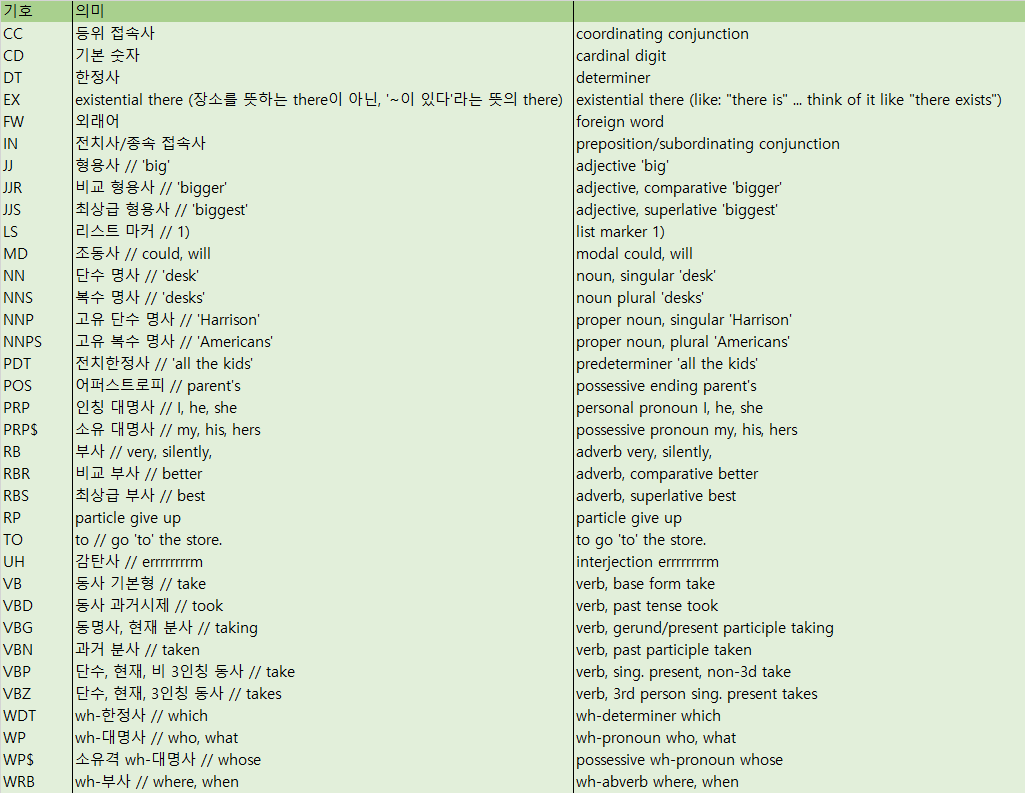

영어 문장에 대해서 토큰화를 수행한 결과를 입력으로 품사 태깅을 수행하였습니다. Penn Treebank POS Tags에서 PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미합니다.


#### **KoNLPy 한국어 품사 태깅**
한국어 자연어 처리를 위해서는 KoNLPy(코엔엘파이)라는 파이썬 패키지를 사용할 수 있습니다. 코엔엘파이를 통해서 사용할 수 있는 형태소 분석기로 Okt(Open Korea Text) - Twitter, 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)가 있습니다.

한국어 NLP에서 형태소 분석기를 사용하여 단어 토큰화. 더 정확히는 형태소 토큰화(morpheme tokenization)를 수행해보겠습니다. 여기서는 Okt와 꼬꼬마 두 개의 형태소 분석기를 사용하여 토큰화를 수행하겠습니다.

In [15]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

In [16]:
okt = Okt()
kkma = Kkma()

In [17]:
# import jpype
# import os

# if not jpype.isJVMStarted():
#     jvm_path = jpype.getDefaultJVMPath()  # 또는 수동 경로 입력
#     jpype.startJVM(jvm_path)

# from konlpy.tag import Okt
# okt = Okt()


In [18]:
# print('OKT 형태소 분석 :', okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
# print('OKT 품사 태깅 :', okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
# print('OKT 명사 추출 :', okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

In [19]:
## OKT 형태소 분석
doc = "열심히 코딩한 당신, 연휴에는 여행을 가봐요."
okt.morphs(doc)  # 형태소 분석 -> 리스트 

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요', '.']

In [20]:
## 품사 태킹 (POS tagging)
okt.pos(doc)  

[('열심히', 'Adverb'),
 ('코딩', 'Noun'),
 ('한', 'Josa'),
 ('당신', 'Noun'),
 (',', 'Punctuation'),
 ('연휴', 'Noun'),
 ('에는', 'Josa'),
 ('여행', 'Noun'),
 ('을', 'Josa'),
 ('가봐요', 'Verb'),
 ('.', 'Punctuation')]

In [21]:
## 명사 추출
okt.nouns(doc)

['코딩', '당신', '연휴', '여행']

위의 예제는 Okt 형태소 분석기로 토큰화를 시도해본 예제입니다. 각각의 메소드는 아래와 같은 기능을 갖고 있습니다.

1) morphs : 형태소 추출
2) pos : 품사 태깅(Part-of-speech tagging)
3) nouns : 명사 추출

앞서 언급한 코엔엘파이의 형태소 분석기들은 공통적으로 이 메소드들을 제공하고 있습니다. 위 예제에서 형태소 추출과 품사 태깅 메소드의 결과를 보면 _조사를 기본적으로 분리하고 있음_ 을 확인할 수 있습니다. 한국어 NLP에서 전처리에 형태소 분석기를 사용하는 것은 굉장히 유용합니다. 이번에는 꼬꼬마 형태소 분석기를 사용하여 같은 문장에 대해서 토큰화를 진행해봅시다.

In [22]:
print('꼬꼬마 형태소 분석 :', kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :', kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :', kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


앞서 사용한 Okt 형태소 분석기와 결과가 다른 것을 볼 수 있습니다. 각 형태소 분석기는 성능과 결과가 다르게 나오기 때문에, 형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 됩니다. 예를 들어서 속도를 중시한다면 메캅을 사용할 수 있습니다.

#### **품사 태깅 클래스 간 비교** 
* 품사 태깅 비교표 : https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit?gid=0#gid=0
  
https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes

※ Twitter 형태소 분석기 => Okt 형태소 분석기 (Open-Korean-Text api)

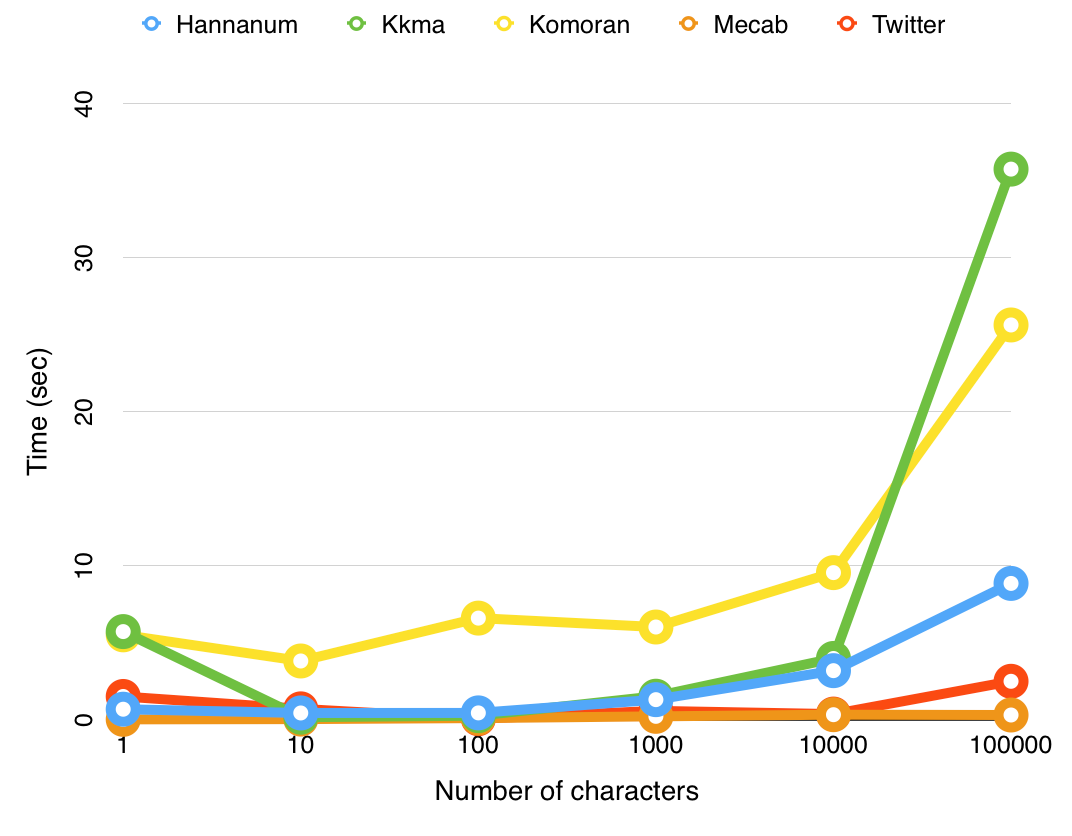

### **성능 분석**
성능 검증은 몇 개의 샘플 문장을 비교하는 것으로 대체합니다.

1. _“아버지가방에들어가신다”_

    이 예시를 통해 띄어쓰기 알고리즘의 성능을 확인해볼 수 있습니다. 이상적인 경우, 이 예시에 대해서는 **아버지 + 가방에 + 들어가신다** 보다는 **아버지가 + 방에 + 들어가신다** 로 해석하는 것이 더 바람직하겠지요.

    |Hannanum	|Kkma	|Komoran	|Mecab	|Twitter    |
    |---|---|---|---|---|
    |아버지가방에들어가 / N	|아버지 / NNG	|아버지가방에들어가신다 / NNP	|아버지 / NNG	|아버지 / Noun  |
    |이 / J	    |가방 / NNG	| 	|가 / JKS	|가방 / Noun    |
    |시ㄴ다 / E	|에 / JKM	| 	|방 / NNG	|에 / Josa		|
    | 	|들어가 / VV	| 	|에 / JKB	|들어가신 / Verb	|
    | 	|시 / EPH	| 	|들어가 / VV	|다 / Eomi	|
    | 	|ㄴ다 / EFN	| 	|신다 / EP+EC	| 	|	 

2. _“나는 밥을 먹는다” vs “하늘을 나는 자동차”_

    두 문장에서 “나는”에 집중해서 본다면, 각 분석기가 태깅할 때 단어의 의미와 주변부를 잘 살피는지 확인해볼 수 있습니다. 첫번째 문장에서 “나는”은 **나/N + 는/J,** 두번째 문장에서는 **나(-ㄹ다)/V + 는/E** 이 되는 것이 바람직합니다.

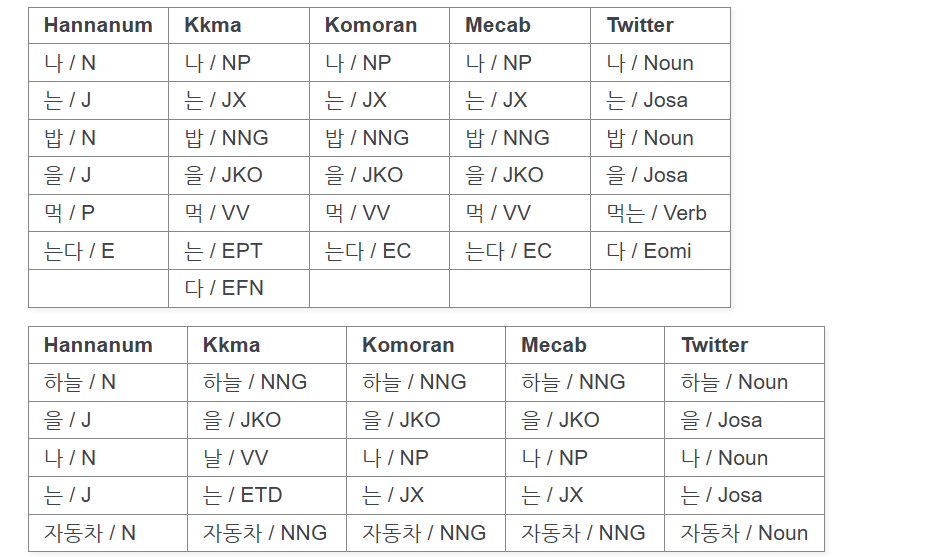

3. _“아이폰 기다리다 지쳐 애플공홈에서 언락폰질러버렸다 6+ 128기가실버ㅋ”_

    각 분석기가 사전에 포함되지 않은 단어를 어떻게 해결하는지 확인해볼까요?

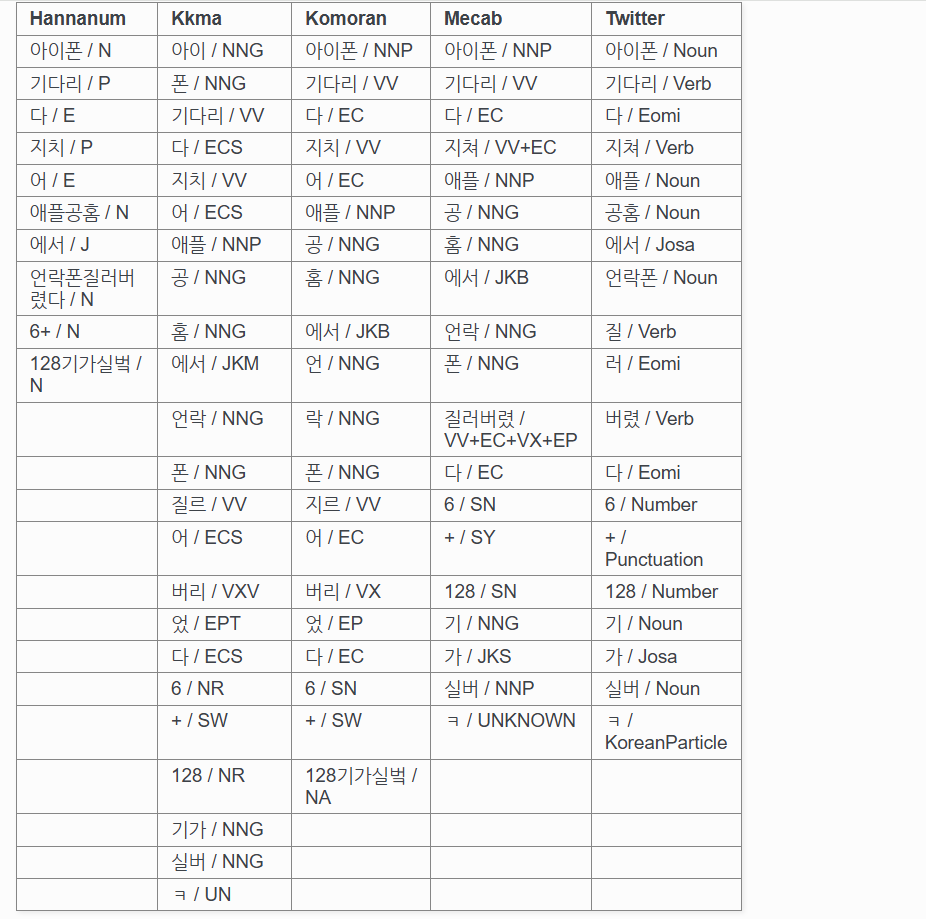

마지막 편집일시 : 2022년 12월 20일 7:59 오전